In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("movies_with_feats_use_me.csv", index_col=0)
del df["Unnamed: 0.1"]
df.head()

,Processed Title,Success,n_unique_words_char_1,n_unique_words_char_2,n_unique_words_char_3,n_unique_words_char_4,n_unique_words_char_5,FK_read_level_char_1,FK_read_level_char_2,FK_read_level_char_3,...,std_of_overall_polarity,wav_polarity,avg_FK,pass_ratio_ch1,pass_ratio_ch2,pass_ratio_ch3,pass_ratio_ch4,pass_ratio_ch5,sign_check_char_mention_polairty,std_of_char_mention_polarity
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Avatar,Avatar,1,670,565,252,425,276,2,2,2,...,0.778124,0.812752,2.4,0.030374,0.035242,0.039370,0.015152,0.040541,0,0.780684
The Dark Knight Rises,"Dark-Knight-Rises,-The",1,531,514,506,418,434,2,2,3,...,0.931835,-0.130804,2.2,0.049057,0.026549,0.059172,0.053691,0.031447,0,0.964138
The Avengers,"Avengers,-The",1,560,623,359,425,205,2,3,3,...,0.775803,0.683503,3.0,0.038462,0.021944,0.024590,0.030075,0.054545,0,0.787237
Pirates of the Caribbean: Dead Man's Chest,Pirates-of-the-Caribbean-Dead-Man's-Chest,1,629,373,285,378,281,2,1,1,...,0.778359,0.523430,1.8,0.039275,0.028986,0.044776,0.037879,0.041096,0,0.621058
Men in Black 3,Men-in-Black-3,1,1206,867,234,209,185,2,3,2,...,0.784953,0.903355,2.8,0.024590,0.033613,0.033333,0.035714,0.078947,0,0.796159


In [3]:
drop = list(df.columns[:24]) + list(df.columns[25:56]) + list(df.columns[57:67]) + list(df.columns[68:73]) + list(df.columns[77:82])
df_1 = df.drop(drop, axis=1)
X = df_1
y = df["Success"]

In [4]:
X["sign_check_char_mention_polairty"] = X["sign_check_char_mention_polairty"].astype(object)
print(X.shape)
X = pd.get_dummies(X)
X.shape

(653, 9)


(653, 11)

In [5]:
y.shape

(653,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Pedro./anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
y_test.value_counts(), 0.824

(1    108
 0     23
 Name: Success, dtype: int64, 0.824)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8244274809160306

In [9]:
logreg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
pd.crosstab(y_test, logreg.predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,1
True,
0,23
1,108


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='precision',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

lr
mlp
dt
rf
svc
knn
gnb
ada
[0.8381978833381634, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 2}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.8369585048745467, {'clf__C': 100, 'clf__gamma': 'auto', 'clf__kernel': 'poly'}, <class 'sklearn.svm.classes.SVC'>]

[0.836098220041647, {'clf__n_neighbors': 3}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.8291975370590673, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.8275862068965517, {'clf__C': 0.0001, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.8275862068965517, {'clf__activation': 'logistic', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.8275862068965517, {'clf__algorithm': 'SAMME', 'clf__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', 

In [12]:
best_score_param_estimator[2].fit(X_train, y_train)
best_score_param_estimator[2].score(X_test, y_test)

0.7709923664122137

In [13]:
best_score_param_estimator[2].predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [14]:
pd.crosstab(y_test, best_score_param_estimators[0][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,9,14
1,37,71


In [15]:
pd.crosstab(y_test, best_score_param_estimators[1][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,6,17
1,10,98


In [16]:
pd.crosstab(y_test, best_score_param_estimators[2][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,1,22
1,9,99


In [17]:
pd.crosstab(y_test, best_score_param_estimators[3][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,4,19
1,25,83


In [18]:
pd.crosstab(y_test, best_score_param_estimators[4][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,1
True,
0,23
1,108


In [19]:
pd.crosstab(y_test, best_score_param_estimators[5][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,1
True,
0,23
1,108


In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X,
                                                                                            y, test_size=0.2, random_state=0, stratify = y)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='precision',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train_resampled, y_train_resampled)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

lr
mlp
dt
rf
svc
knn
gnb
ada
[0.8381978833381634, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 2}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.8369585048745467, {'clf__C': 100, 'clf__gamma': 'auto', 'clf__kernel': 'poly'}, <class 'sklearn.svm.classes.SVC'>]

[0.836098220041647, {'clf__n_neighbors': 3}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.8291975370590673, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.8275862068965517, {'clf__C': 0.0001, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.8275862068965517, {'clf__activation': 'logistic', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.8275862068965517, {'clf__algorithm': 'SAMME', 'clf__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', 

In [31]:
best_score_param_estimators[0][2].fit(X_train_resampled, y_train_resampled)
pd.crosstab(y_test_resampled, best_score_param_estimators[0][2].predict(X_test_resampled), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,9,14
1,37,71


In [32]:
best_score_param_estimators[0][2].score(X_test_resampled, y_test_resampled)

0.6106870229007634

In [33]:
best_score_param_estimators[1][2].fit(X_train_resampled, y_train_resampled)
pd.crosstab(y_test_resampled, best_score_param_estimators[1][2].predict(X_test_resampled), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,6,17
1,10,98


In [34]:
best_score_param_estimators[1][2].score(X_test_resampled, y_test_resampled)

0.7938931297709924

In [36]:
y_test_resampled.value_counts()

1    108
0     23
Name: Success, dtype: int64

In [24]:
pd.crosstab(y_test, best_score_param_estimators[2][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,2,21
1,4,104


In [25]:
pd.crosstab(y_test, best_score_param_estimators[3][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,8,15
1,46,62


In [26]:
pd.crosstab(y_test, best_score_param_estimators[4][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,1
True,
0,23
1,108


In [27]:
pd.crosstab(y_test, best_score_param_estimators[5][2].predict(X_test), rownames=['True'], colnames=['Predicted'])

Predicted,1
True,
0,23
1,108


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='recall',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

lr
mlp
dt
rf
svc
knn
gnb
ada
[1.0, {'clf__C': 0.0001, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[1.0, {'clf__activation': 'logistic', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[1.0, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 10}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[1.0, {'clf__C': 0.01, 'clf__gamma': 'auto', 'clf__kernel': 'linear'}, <class 'sklearn.svm.classes.SVC'>]

[1.0, {'clf__algorithm': 'SAMME', 'clf__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'clf__learning_rate': 0.01

In [15]:
best_score_param_estimator[2].predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [77]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0, stratify = y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1080, 653]

In [11]:
import pandas as pd
df = pd.read_csv("movies_with_feats_pedro.csv", index_col=0)
del df["Unnamed: 0.1"]
df.head()

,Processed Title,Success,n_unique_words_char_1,n_unique_words_char_2,n_unique_words_char_3,n_unique_words_char_4,n_unique_words_char_5,FK_read_level_char_1,FK_read_level_char_2,FK_read_level_char_3,...,pass_ratio_ch4,pass_ratio_ch5,sign_check_char_mention_polairty,std_of_char_mention_polarity,main_char_rel_diag_length,stdvs_unique_words_above_mean,FK_read_level_mean_char,stdvs_n_stop_words_above_mean,stdvs_n_curse_words_above_mean,stdvs_n_mentions_others_above_mean
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Avatar,Avatar,1,670,565,252,425,276,2,2,2,...,0.015152,0.040541,0,0.780684,39.537232,-0.090538,2.4,0.063141,0.106202,-0.541956
The Dark Knight Rises,"Dark-Knight-Rises,-The",1,531,514,506,418,434,2,2,3,...,0.053691,0.031447,0,0.964138,23.705825,0.255438,2.2,0.789323,-0.686754,-0.176310
The Avengers,"Avengers,-The",1,560,623,359,425,205,2,3,3,...,0.030075,0.054545,0,0.787237,30.146047,-0.118151,3.0,-0.004098,-0.709410,-0.438622
Pirates of the Caribbean: Dead Man's Chest,Pirates-of-the-Caribbean-Dead-Man's-Chest,1,629,373,285,378,281,2,1,1,...,0.037879,0.041096,0,0.621058,36.743621,-0.481995,1.8,-0.057889,-0.732066,-0.867858
Men in Black 3,Men-in-Black-3,1,1206,867,234,209,185,2,3,2,...,0.035714,0.078947,0,0.796159,57.328163,0.742729,2.8,0.533814,-0.437539,1.349863


In [12]:
X = df.drop(["Processed Title", "Success"], axis=1)
y = df["Success"]

In [5]:
from scipy.stats import pointbiserialr

corr = {}
for feature in X.columns:
    try:
        corr[feature] = pointbiserialr(X[feature].values, y.values)
    except:
        print(feature)
        
import operator
sorted_corr = sorted(corr.items(), key=operator.itemgetter(1))

In [6]:
X.drop(["polarity_of_mentions_char_1", "polarity_of_mentions_char_2", "polarity_of_mentions_char_3",
       "polarity_of_mentions_char_4", "polarity_of_mentions_char_5"], axis=1, inplace=True)

In [7]:
import operator
sorted_corr = sorted(corr.items(), key=operator.itemgetter(1))

In [8]:
sorted_corr

[('pass_ratio_ch2',
  PointbiserialrResult(correlation=-0.11371215076451544, pvalue=0.00361821707226399)),
 ('std_of_overall_polarity',
  PointbiserialrResult(correlation=-0.06819862262879554, pvalue=0.08160870817513242)),
 ('n_unique_words_char_5',
  PointbiserialrResult(correlation=-0.0625966891567367, pvalue=0.11002292942385287)),
 ('num_pass_sents_char_2',
  PointbiserialrResult(correlation=-0.05359501936621161, pvalue=0.17133738384685857)),
 ('passive_ratio',
  PointbiserialrResult(correlation=-0.051792981697795296, pvalue=0.18621398239352427)),
 ('std_of_char_mention_polarity',
  PointbiserialrResult(correlation=-0.050885822636434465, pvalue=0.19405393590290626)),
 ('neg_polarity_of_mentions_char_3',
  PointbiserialrResult(correlation=-0.04710670979464909, pvalue=0.2293172027015947)),
 ('FK_read_level_char_5',
  PointbiserialrResult(correlation=-0.04528818150896306, pvalue=0.24781870811718298)),
 ('neg_polarity_of_mentions_char_4',
  PointbiserialrResult(correlation=-0.0420038223

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

NameError: name 'X_train' is not defined

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0, stratify = y_resampled)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6481481481481481

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)
best_score_param_estimator[2].fit(X_train, y_train)
best_score_param_estimator[2].score(X_train, y_train)

0.7088122605363985

In [51]:
best_score_param_estimator[2]

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-10))])

In [53]:
model = GaussianNB(priors=None, var_smoothing=1e-10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5648854961832062

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7786259541984732

In [66]:
best_feats = [feat_tuple[0] for feat_tuple in sorted_corr[:6] + sorted_corr[-7:]]

In [69]:
X = df[best_feats]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
#st = StandardScaler()
#X_train = st.fit_transform(X_train)
#X_test = st.transform(X_test)
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#lr.score(X_test, y_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

lr
mlp
dt
rf
svc
knn
gnb
ada
[0.8295019157088123, {'clf__C': 0.1, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.8295019157088123, {'clf__algorithm': 'SAMME.R', 'clf__base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'clf__learning_rate': 1, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>]

[0.8275862068965517, {'clf__activation': 'identity', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.8275862068965517, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.8275862068965517, {'clf__min_samples_leaf': 10, 'clf__min_samples

In [72]:
lr = LogisticRegression(C= 0.1, multi_class="multinomial", solver="newton-cg")
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.816793893129771

In [73]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        "ada": AdaBoostClassifier(random_state=0),
       }

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    
param_grids = {}

C_range = [10 ** i for i in range(-4, 5)]
param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['rf'] = param_grid

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': ['auto', 'scale'],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]
param_grids['svc'] = param_grid

param_grid = [{'clf__n_neighbors': list(range(1, 11))}]
param_grids['knn'] = param_grid

param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
param_grids['gnb'] = param_grid

param_grid = [{'clf__base_estimator': [DecisionTreeClassifier(max_depth=1), LogisticRegression(random_state=0), 
                                      ], "clf__n_estimators": [i*10 for i in range(2, 7)], 
              "clf__learning_rate": [0.01, 0.1, 1], "clf__algorithm": ["SAMME", "SAMME.R"]}]
param_grids['ada'] = param_grid

#param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]
#param_grids['gdb'] = param_grid

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    # Implement me
    gs = gs.fit(X_train, y_train)
    
    print(name)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort best_score_param_estimators in descending order of the best_score_
# Implement me
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

lr
mlp
dt
rf
svc
knn
gnb
ada
[0.8295019157088123, {'clf__C': 0.1, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.8295019157088123, {'clf__algorithm': 'SAMME.R', 'clf__base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'clf__learning_rate': 1, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>]

[0.8275862068965517, {'clf__activation': 'identity', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.8275862068965517, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.8275862068965517, {'clf__min_samples_leaf': 10, 'clf__min_samples

In [150]:
import os
path = os.getcwd()[:os.getcwd().find("feat_extraction")] + "success_data.csv"
df = pd.read_csv(path, index_col=0)


In [151]:
mn = df["Domestic ROI (%)"].mean()
std = df["Domestic ROI (%)"].std()

In [152]:
df.shape

(653, 7)

In [153]:
list_to_keep = []
for i in range(df.shape[0]):
    if df.iloc[i]["Domestic ROI (%)"] > 2*(std - mn) or df.iloc[i]["Domestic ROI (%)"] < -2*(std - mn):
        pass
    else:
        list_to_keep.append(df.iloc[i]["Processed Title"])

In [154]:
df = df[df["Processed Title"].isin(list_to_keep)]
df.shape

(636, 7)

In [155]:
#df = pd.read_csv(path, index_col=0)

def discretize(row):
    if row["Domestic ROI (%)"] > 70:
        return 1
    #elif 70 > row["Domestic ROI (%)"] > 25:
    #    return 1
    else:
        return 0

df["Success"] = df.apply(discretize, axis=1)
df1 = pd.read_csv("movies_with_feats_use_me.csv", index_col=0)
del df1["Unnamed: 0.1"]
df1.head()
df1 = df1[df1["Processed Title"].isin(list_to_keep)]

In [156]:
y = df["Success"]
y.value_counts()

0    369
1    267
Name: Success, dtype: int64

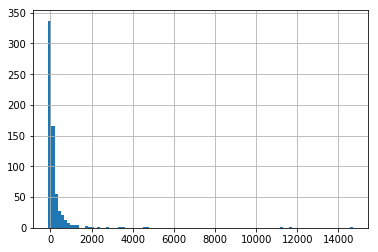

In [66]:
df = pd.read_csv(path, index_col=0)
df["Domestic ROI (%)"].hist(bins=100)
plt.show()

In [57]:
y.head()

Avatar                                        1
The Dark Knight Rises                         0
The Avengers                                  1
Pirates of the Caribbean: Dead Man's Chest    1
Men in Black 3                                0
Name: Success, dtype: int64

In [157]:
X = df1.drop(["Success", "Processed Title", "polarity_of_mentions_char_1", "polarity_of_mentions_char_2", "polarity_of_mentions_char_3",
       "polarity_of_mentions_char_4", "polarity_of_mentions_char_5"], axis=1)

In [158]:
X.head()

,n_unique_words_char_1,n_unique_words_char_2,n_unique_words_char_3,n_unique_words_char_4,n_unique_words_char_5,FK_read_level_char_1,FK_read_level_char_2,FK_read_level_char_3,FK_read_level_char_4,FK_read_level_char_5,...,std_of_overall_polarity,wav_polarity,avg_FK,pass_ratio_ch1,pass_ratio_ch2,pass_ratio_ch3,pass_ratio_ch4,pass_ratio_ch5,sign_check_char_mention_polairty,std_of_char_mention_polarity
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Avatar,670,565,252,425,276,2,2,2,3,3,...,0.778124,0.812752,2.4,0.030374,0.035242,0.039370,0.015152,0.040541,0,0.780684
The Dark Knight Rises,531,514,506,418,434,2,2,3,2,2,...,0.931835,-0.130804,2.2,0.049057,0.026549,0.059172,0.053691,0.031447,0,0.964138
The Avengers,560,623,359,425,205,2,3,3,4,3,...,0.775803,0.683503,3.0,0.038462,0.021944,0.024590,0.030075,0.054545,0,0.787237
Pirates of the Caribbean: Dead Man's Chest,629,373,285,378,281,2,1,1,1,4,...,0.778359,0.523430,1.8,0.039275,0.028986,0.044776,0.037879,0.041096,0,0.621058
Men in Black 3,1206,867,234,209,185,2,3,2,3,4,...,0.784953,0.903355,2.8,0.024590,0.033613,0.033333,0.035714,0.078947,0,0.796159


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.515625

In [161]:
y_test.value_counts(), 74/(74+54)

(0    74
 1    54
 Name: Success, dtype: int64, 0.578125)

In [162]:
lr.predict(X_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(lr.predict(X_test), y_test)

array([[52, 40],
       [22, 14]])

In [32]:
from scipy.stats import pointbiserialr

corr = {}
for feature in X.columns:
    try:
        corr[feature] = pointbiserialr(X[feature].values, y.values)
    except:
        print(feature)
        
import operator
sorted_corr = sorted(corr.items(), key=operator.itemgetter(1))

In [33]:
sorted_corr

[('pass_ratio_ch2',
  PointbiserialrResult(correlation=-0.1212353967188512, pvalue=0.0019121258500790137)),
 ('num_pass_sents_char_2',
  PointbiserialrResult(correlation=-0.07569013672462153, pvalue=0.053206190017626845)),
 ('n_stop_words_char_4',
  PointbiserialrResult(correlation=-0.06455447473380516, pvalue=0.0993167293190397)),
 ('std_of_overall_polarity',
  PointbiserialrResult(correlation=-0.06197132245418844, pvalue=0.1136282059569927)),
 ('neg_polarity_of_mentions_char_4',
  PointbiserialrResult(correlation=-0.06167384884093987, pvalue=0.1153754289101969)),
 ('n_unique_words_char_4',
  PointbiserialrResult(correlation=-0.06043575653325392, pvalue=0.12287476908939912)),
 ('std_of_char_mention_polarity',
  PointbiserialrResult(correlation=-0.05694529053089997, pvalue=0.14606725179201818)),
 ('num_pass_sents_char_4',
  PointbiserialrResult(correlation=-0.05511875574275749, pvalue=0.15946645332242898)),
 ('FK_read_level_char_5',
  PointbiserialrResult(correlation=-0.054967765943668

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5801526717557252

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Pedro./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.648854961832061

In [16]:
logreg.predict(X_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [17]:
y = df["Worldwide ROI (%)"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.02988346926326213

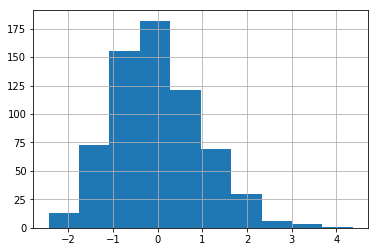

In [57]:
df["stdvs_unique_words_above_mean"].hist()
plt.show()

In [58]:
df["stdvs_unique_words_above_mean"] = df["stdvs_unique_words_above_mean"].apply(lambda x: round(x))

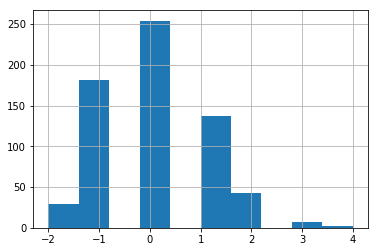

In [59]:
df["stdvs_unique_words_above_mean"].hist()
plt.show()

In [60]:
df["stdvs_unique_words_above_mean"] = df["stdvs_unique_words_above_mean"].apply(lambda x: str(round(x)))

In [61]:
df["FK_read_level_mean_char"] = df["FK_read_level_mean_char"].apply(lambda x: str(round(x)))
df["stdvs_n_stop_words_above_mean"] = df["stdvs_n_stop_words_above_mean"].apply(lambda x: str(round(x)))
df["stdvs_n_curse_words_above_mean"] = df["stdvs_n_curse_words_above_mean"].apply(lambda x: str(round(x)))
df["stdvs_n_mentions_others_above_mean"] = df["stdvs_n_mentions_others_above_mean"].apply(lambda x: str(round(x)))

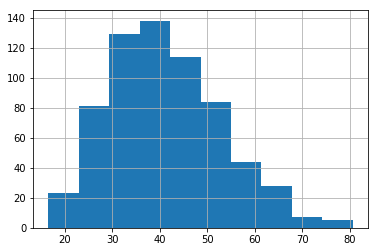

In [62]:
df["main_char_rel_diag_length"].hist()
plt.show()

In [63]:
X = df.drop(["Success", "Processed Title"], axis=1)
X = pd.get_dummies(X)
y = df["Success"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [39]:
y_test.value_counts()

1    108
0     23
Name: Success, dtype: int64

In [40]:
0.824

0.824

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7175572519083969

In [66]:
rf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [67]:
rf.score(X_train, y_train)

0.9865900383141762

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8244274809160306

In [69]:
logreg.score(X_train, y_train)

0.8275862068965517

In [70]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8244274809160306

In [71]:
svm.score(X_train, y_train)

0.8275862068965517

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8091603053435115

In [73]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])